In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/dogbreed/"
sz=244
arch=resnext50
bs=24

In [5]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)
# this creates the validation dataset
print(val_idxs)
print(n)

[3694 1573 6281 ..., 5734 5191 5390]
10222


In [6]:
label_df = pd.read_csv(label_csv)

In [7]:
#label_df.head()

In [8]:
#label_df.pivot_table(index="breed", aggfunc=len).sort_values('id', ascending=True)


In [9]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train' ,f'{PATH}labels.csv', test_name='test', val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)

In [10]:
learn = ConvLearner.pretrained(arch,data)


In [11]:
lrf=learn.lr_find()

A Jupyter Widget

 84%|████████▎ | 285/341 [01:44<00:20,  2.73it/s, loss=9.29]

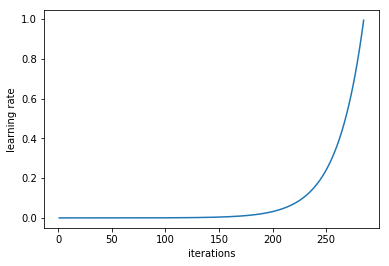

In [12]:
learn.sched.plot_lr()

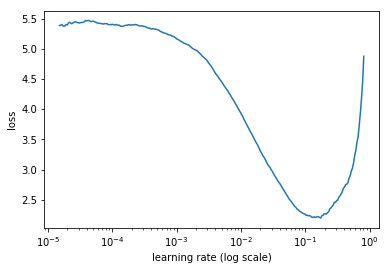

In [13]:
learn.sched.plot()

In [14]:
learn.fit(1e-2,2)

A Jupyter Widget

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[ 0.       0.68663  0.35846  0.89438]                        
[ 1.       0.47215  0.29612  0.90698]                        



In [15]:
learn.fit(1e-2,2,cycle_len=1)

A Jupyter Widget

[ 0.       0.33554  0.26781  0.91667]                        
[ 1.       0.30483  0.26421  0.91231]                        



In [16]:
learn.fit(1e-3,2, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.29444  0.25433  0.91861]                        
[ 1.       0.27279  0.25355  0.91812]                        
[ 2.       0.27411  0.25649  0.91957]                        



In [19]:
log_preds, y = learn.TTA(is_test=True)
probs = np.exp(log_preds)

In [22]:
probs.shape

(10357, 120)

In [42]:
df = pd.DataFrame(probs)
df.columns = data.classes

AttributeError: 'ImageClassifierData' object has no attribute 'test_df'

In [43]:
df.insert(0,'id',[o[5:-4] for o in data.test_ds.fnames])

In [44]:
df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,fd1a7be32f10493735555e62913c0841,1.866953e-05,1.172434e-04,8.027469e-06,1.551378e-05,4.539322e-07,1.789163e-06,2.402264e-05,1.704947e-06,2.474162e-06,...,3.627764e-04,4.295414e-06,2.965463e-06,5.529704e-06,9.800078e-06,4.744123e-06,6.097488e-07,2.875952e-06,1.038005e-05,1.132505e-05
1,5273d42f02b4715cb93845205995ef64,3.631459e-06,1.136757e-05,4.600122e-06,1.164993e-05,2.481622e-06,6.474572e-06,2.362806e-06,1.766405e-06,5.211272e-07,...,1.114785e-07,1.088702e-07,7.370159e-06,8.793728e-06,2.013350e-05,3.015408e-07,3.140917e-06,3.833009e-05,3.296837e-06,9.833093e-07
2,442057a3142f4d75a1023db363e2fb54,6.844937e-08,3.097025e-07,7.726032e-08,1.954423e-07,7.305477e-08,1.182241e-07,5.723131e-08,6.111197e-09,2.552700e-06,...,2.567239e-08,9.615147e-08,1.613188e-07,6.558738e-06,1.364567e-07,7.807266e-09,4.483566e-09,2.877600e-09,3.260326e-08,9.161845e-08
3,fb03302b030afd122e0f4936c158f6c1,4.441444e-03,5.007303e-05,1.148002e-04,1.430082e-05,5.916148e-05,1.908966e-05,5.175589e-04,1.975150e-05,6.360030e-05,...,4.892303e-03,1.196980e-03,1.106202e-04,7.184261e-05,1.034820e-04,1.355435e-05,7.337201e-05,5.080494e-05,1.734113e-04,6.122844e-02
4,511ca6e3539192aa5c8747bb697e0525,4.479596e-07,8.069000e-08,1.060179e-06,4.291417e-08,2.903828e-07,2.989522e-08,3.628082e-07,1.494350e-08,8.933925e-07,...,1.326296e-04,4.719619e-06,1.408499e-07,2.863486e-08,6.439770e-07,1.152334e-06,2.277584e-06,3.538300e-07,2.998717e-06,2.785338e-06


In [45]:
SUBM = f'{PATH}subm/'

In [46]:
os.makedirs(SUBM,exist_ok=True)

In [48]:
df.to_csv(f'{SUBM}subm.gz',compression='gzip',index=False)

In [49]:
FileLink(f'{SUBM}subm.gz')

/home/ubuntu/fastai/xrwang/data/dogbreed/subm/subm.gz